## Smart Home Energy Consumption Prediction Using ML

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)

### Load Dataset

In [2]:
df1 = pd.read_csv("../data/raw_data/HomeC_0.csv", low_memory=False)
df2 = pd.read_csv("../data/raw_data/HomeC_1.csv", low_memory=False)

# Concatenate both dataframes
df = pd.concat([df1, df2], axis=0)

df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


## Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 253910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  int64  
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]            5

In [4]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [5]:
df.describe()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,5.039100e+05,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,1.451876e+09,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.454664e+05,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,1.451624e+09,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,1.451750e+09,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,1.451876e+09,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,1.452002e+09,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,1.452128e+09,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [6]:
others = df[['Garage door [kW]', 'Kitchen 12 [kW]','Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]','Microwave [kW]', 'Living room [kW]', 'Solar [kW]']]

others.describe()

,Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229
std,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428
min,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367
50%,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283
75%,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917
max,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883


In [7]:
df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [8]:
df.duplicated().sum()

0

### OBSERVATIONS SO FAR

* No missing values
* No duplicates
* Duplicate columns ( use [kW] and House overall [kW])
* time column is not in the proper format


### DATA ANALYSIS

In [9]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


Text(0.5, 1.0, 'Total Energy Consumption Dist')

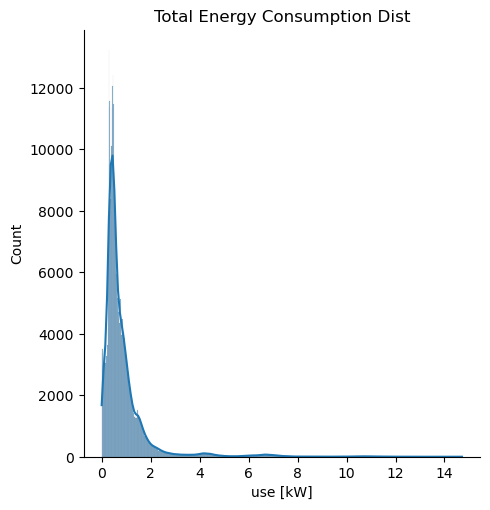

In [10]:
# Distribution of Energy Consumption
sns.displot(df, x="use [kW]", kde=True)
plt.title("Total Energy Consumption Dist")

Text(0.5, 1.0, 'Fridge Consumption Dist')

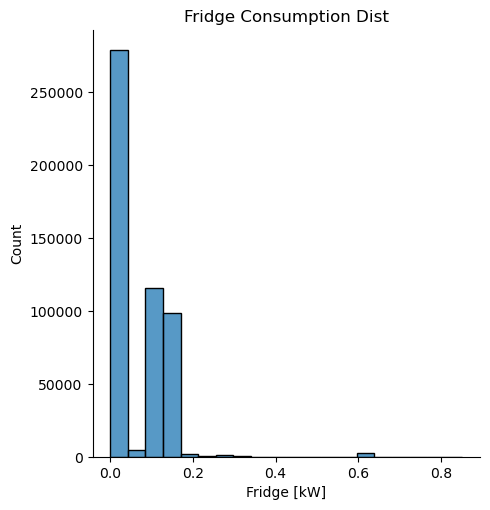

In [11]:
# Distribution of the Fridge Consumption
sns.displot(df, x="Fridge [kW]", bins=20)
plt.title("Fridge Consumption Dist")

Text(0.5, 1.0, 'Living Room Energy Consumption Dist')

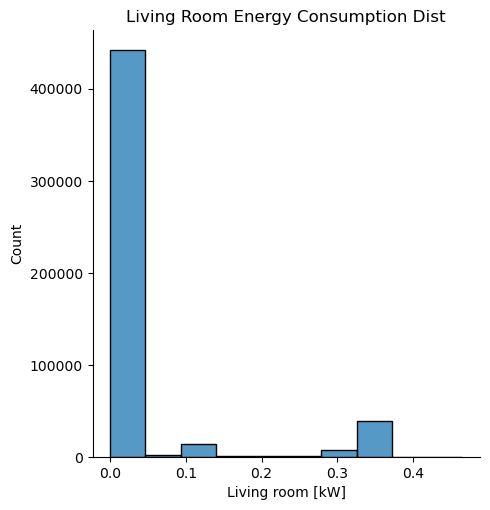

In [12]:
# Distribution of the Living Room Consumption
sns.displot(df, x="Living room [kW]", bins=10)
plt.title("Living Room Energy Consumption Dist")

### Weather Conditions Distribution

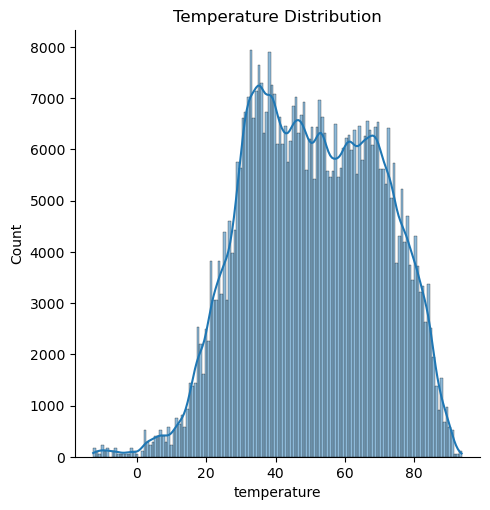

In [13]:
sns.displot(df, x='temperature', kde=True)
plt.title('Temperature Distribution')
plt.show()

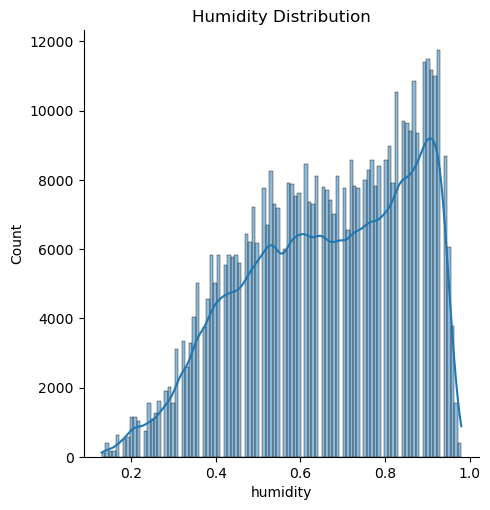

In [14]:
sns.displot(df, x='humidity', kde=True)
plt.title('Humidity Distribution')
plt.show()

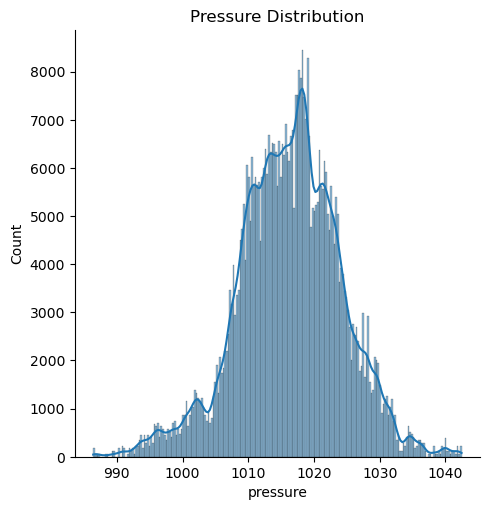

In [15]:
sns.displot(df, x='pressure', kde=True)
plt.title('Pressure Distribution')
plt.show()

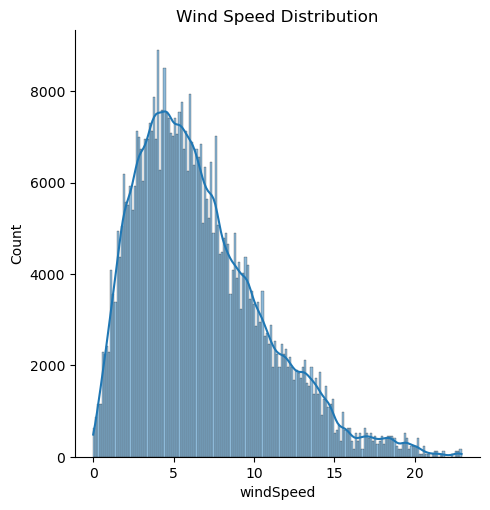

In [16]:
sns.displot(df, x='windSpeed', kde=True)
plt.title('Wind Speed Distribution')
plt.show()

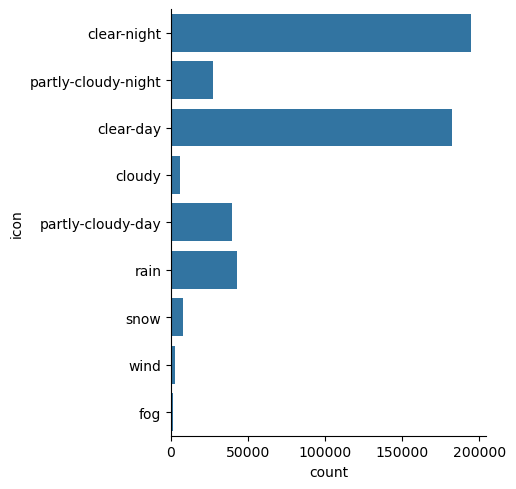

In [17]:
sns.catplot(df, y='icon', kind='count')

### TIME SERIES

* To see energy consumption based on different time - Daily, Hourly, Monthly...

In [18]:
# Remove the kW at the end of column names & space between names
df.columns = [col.replace(' [kW]',"").replace(" ", "_") for col in df.columns]

# Make all column names lower case
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['time', 'use', 'gen', 'house_overall', 'dishwasher', 'furnace_1',
       'furnace_2', 'home_office', 'fridge', 'wine_cellar', 'garage_door',
       'kitchen_12', 'kitchen_14', 'kitchen_38', 'barn', 'well', 'microwave',
       'living_room', 'solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparenttemperature', 'pressure', 'windspeed', 'cloudcover',
       'windbearing', 'precipintensity', 'dewpoint', 'precipprobability'],
      dtype='object')

In [19]:
df.dtypes

time                   datetime64[ns]
use                           float64
gen                           float64
house_overall                 float64
dishwasher                    float64
furnace_1                     float64
furnace_2                     float64
home_office                   float64
fridge                        float64
wine_cellar                   float64
garage_door                   float64
kitchen_12                    float64
kitchen_14                    float64
kitchen_38                    float64
barn                          float64
well                          float64
microwave                     float64
living_room                   float64
solar                         float64
temperature                   float64
icon                           object
humidity                      float64
visibility                    float64
summary                        object
apparenttemperature           float64
pressure                      float64
windspeed   

In [20]:
# Creating numerical columns for aggregation
num_df = df.drop(['icon','summary', 'cloudcover'], axis=1)

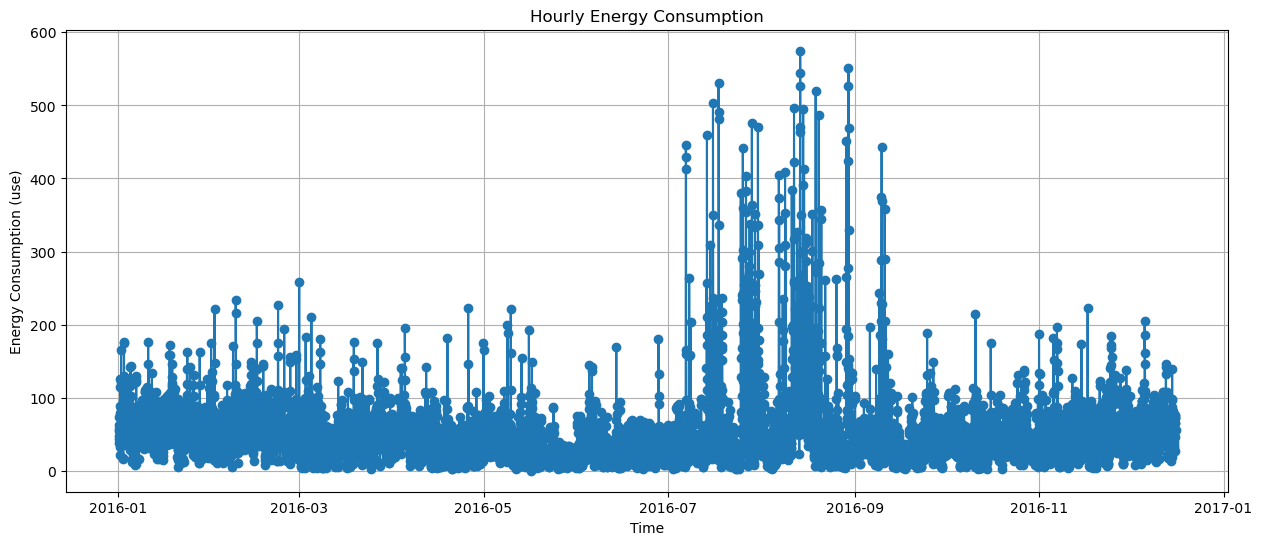

In [29]:
# Group by hour and sum the 'use' column
num_df_hourly = num_df.resample('h', on='time').sum()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(num_df_hourly.index, num_df_hourly['use'], marker='o')
plt.title('Hourly Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (use)')
plt.grid(True)
plt.show()


### Daily, Weekly, and Montly Energy Consumption

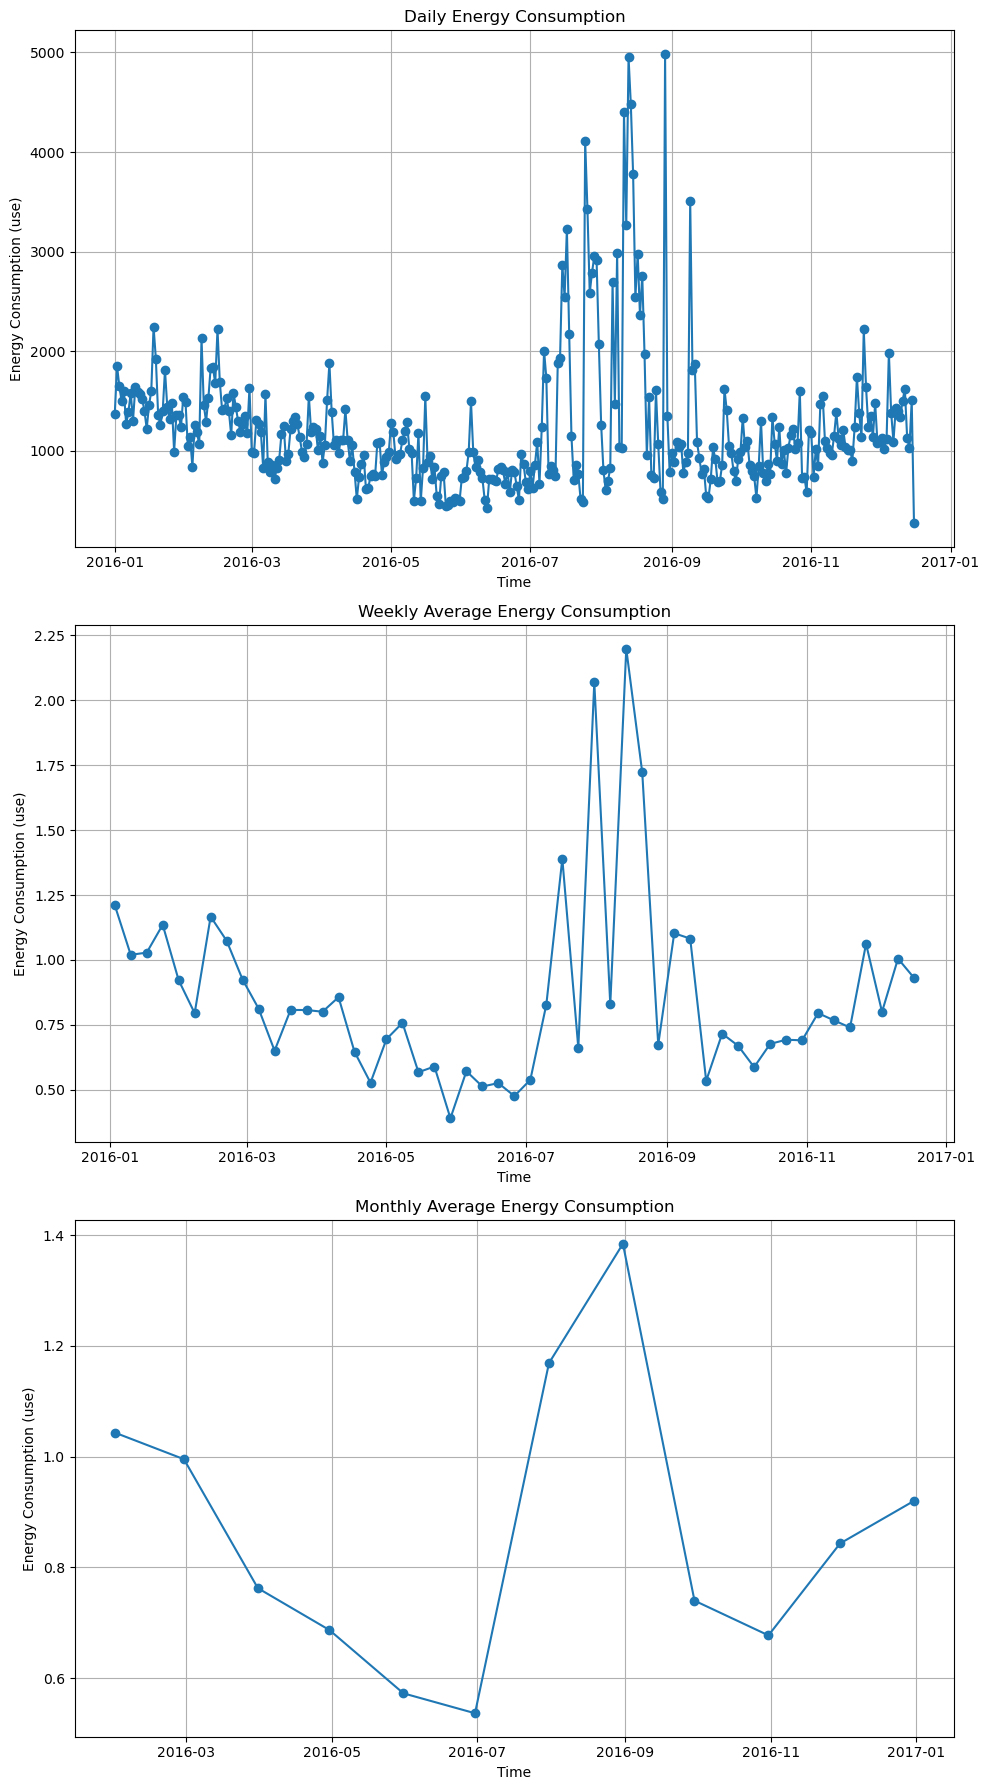

In [43]:

# Group by day, week, and month
num_df_daily = num_df.resample('d', on='time').sum()
num_df_weekly = num_df.resample('W', on='time').mean()
num_df_monthly = num_df.resample('ME', on='time').mean()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot daily energy consumption
axs[0].plot(num_df_daily.index, num_df_daily['use'], marker='o')
axs[0].set_title('Daily Energy Consumption')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Energy Consumption (use)')
axs[0].grid(True)

# Plot weekly energy consumption
axs[1].plot(num_df_weekly.index, num_df_weekly['use'], marker='o')
axs[1].set_title('Weekly Average Energy Consumption')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Energy Consumption (use)')
axs[1].grid(True)

# Plot monthly energy consumption
axs[2].plot(num_df_monthly.index, num_df_monthly['use'], marker='o')
axs[2].set_title('Monthly Average Energy Consumption')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Energy Consumption (use)')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



### Daily, Weekly, and Montly Energy Generated

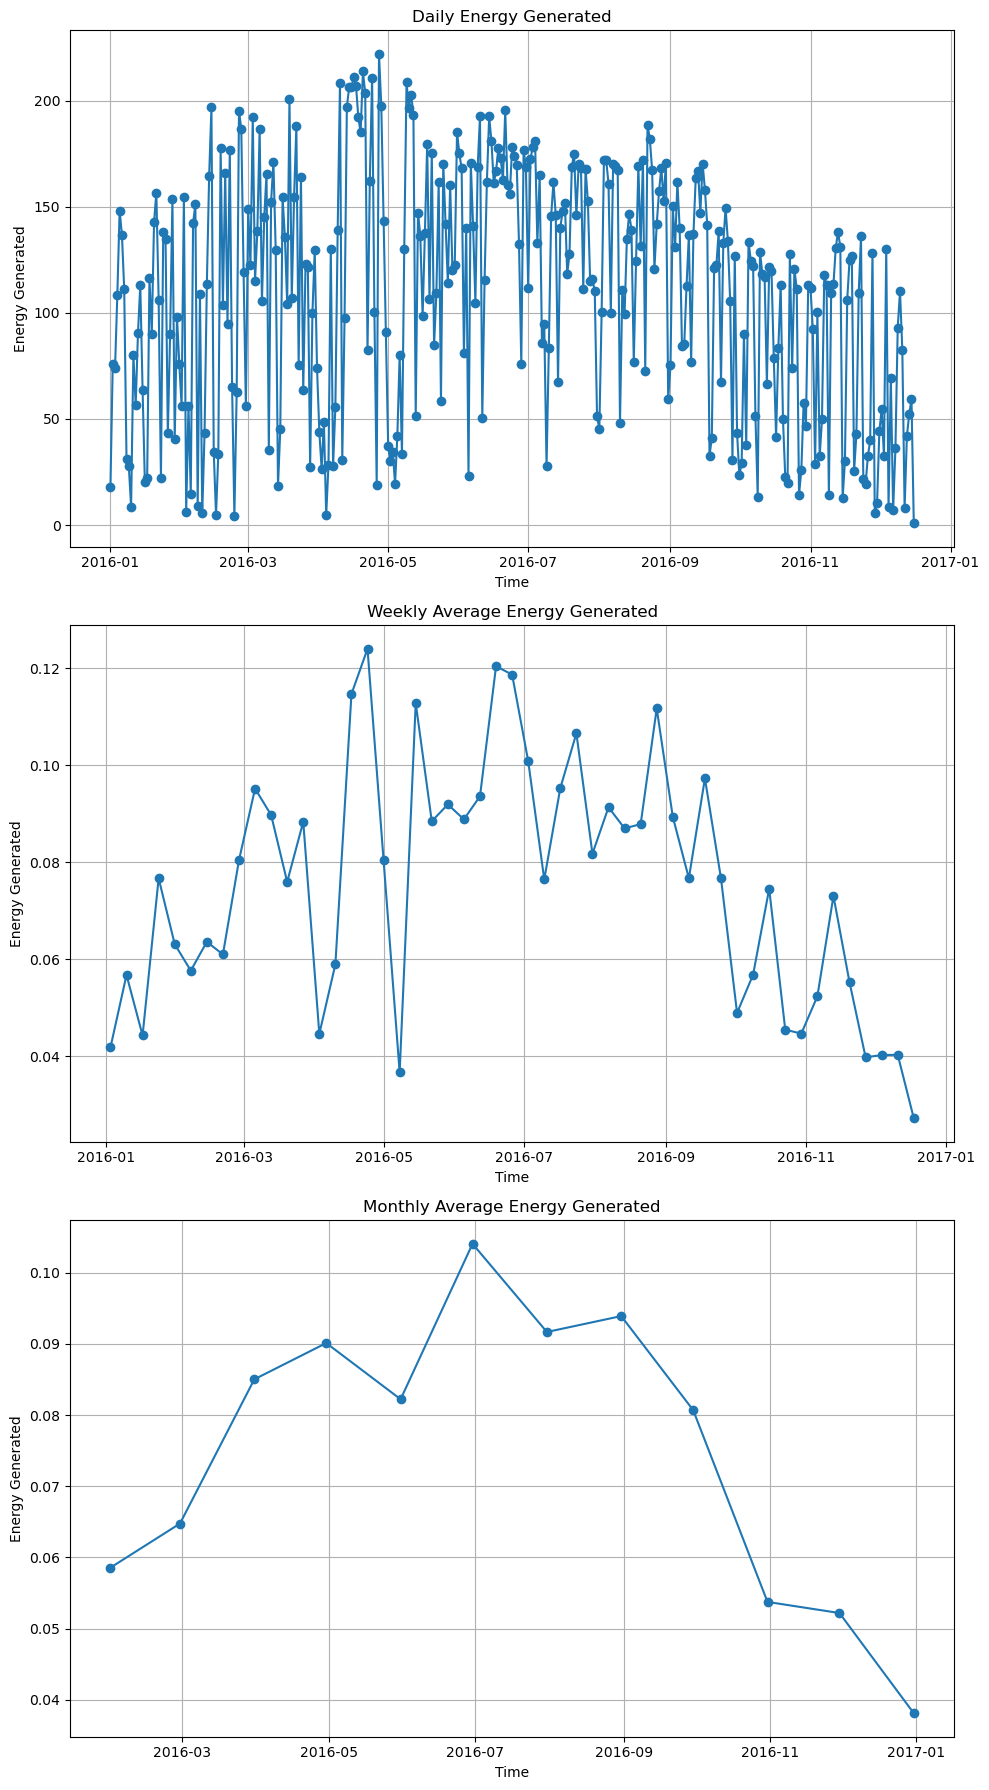

In [44]:

# Group by day, week, and month
num_df_daily = num_df.resample('d', on='time').sum()
num_df_weekly = num_df.resample('W', on='time').mean()
num_df_monthly = num_df.resample('ME', on='time').mean()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot daily energy consumption
axs[0].plot(num_df_daily.index, num_df_daily['gen'], marker='o')
axs[0].set_title('Daily Energy Generated')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Energy Generated')
axs[0].grid(True)

# Plot weekly energy consumption
axs[1].plot(num_df_weekly.index, num_df_weekly['gen'], marker='o')
axs[1].set_title('Weekly Average Energy Generated')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Energy Generated')
axs[1].grid(True)

# Plot monthly energy consumption
axs[2].plot(num_df_monthly.index, num_df_monthly['gen'], marker='o')
axs[2].set_title('Monthly Average Energy Generated')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Energy Generated')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



### Daily, Weekly, and Montly Energy Consumption by Different Appliances